In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("sales_data_sample.csv", encoding="unicode_escape")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
df.drop(['ORDERNUMBER', 'ORDERDATE',  'CUSTOMERNAME', 'PHONE','ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE','STATUS', 'QTR_ID','TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1, inplace=True)

In [6]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [7]:
le=LabelEncoder()
df['PRODUCTLINE']=le.fit_transform(df['PRODUCTLINE'])
df['PRODUCTCODE']=le.fit_transform(df['PRODUCTCODE'])
df['COUNTRY']=le.fit_transform(df['COUNTRY'])
df['DEALSIZE']=le.fit_transform(df['DEALSIZE'])

In [8]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2,2003,1,95,0,18,2
1,34,81.35,5,2765.90,5,2003,1,95,0,6,2
2,41,94.74,2,3884.34,7,2003,1,95,0,6,1
3,45,83.26,6,3746.70,8,2003,1,95,0,18,1
4,49,100.00,14,5205.27,10,2003,1,95,0,18,1


In [9]:
column_names = df.columns  

In [10]:
sc=StandardScaler()
df=sc.fit_transform(df)

In [11]:
score=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    score.append(kmeans.inertia_)

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

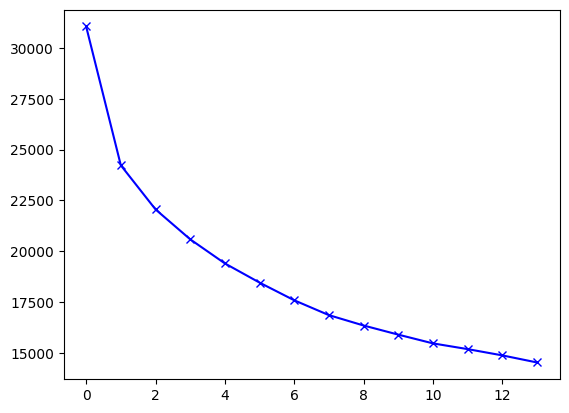

In [12]:
plt.plot(score, 'bx-')

In [13]:
kmeans=KMeans(4)
model=kmeans.fit(df)

C:\Users\meenu\anaconda32\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
label=kmeans.labels_

In [36]:
label

array([1, 1, 2, ..., 3, 0, 3])

In [16]:
kmeans.cluster_centers_.shape

(4, 11)

In [25]:
cc = pd.DataFrame(kmeans.cluster_centers_, columns=column_names)
cc

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,-0.015452,-1.488688,0.010458,-0.913939,-0.034595,0.012686,0.310321,-1.028330,0.426471,0.021133,1.015353
1,-1.003918,0.160603,0.078320,-0.679881,0.065738,-0.035031,-0.084341,-0.117560,0.169672,-0.103979,0.960545
2,0.167631,0.763109,-0.080704,1.030412,0.065061,-0.119459,-0.703394,1.305622,-1.035265,-0.037530,-0.980795
3,0.596451,0.462535,-0.002082,0.407219,-0.069405,0.106227,0.355446,-0.112971,0.338212,0.086000,-0.723280


In [23]:
cc=sc.inverse_transform(cc)
cc = pd.DataFrame(cc, columns=column_names)
cc

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,34.942308,53.630666,6.510355,1870.835370,6.965976,2003.823964,3.263314,59.396450,67.241124,12.159763,2.000000
1,25.314935,86.898019,6.797078,2301.862516,7.332792,2003.790584,2.311688,95.991883,59.131494,11.387987,1.967532
2,36.725490,99.050980,6.125189,5451.432489,7.330317,2003.731523,0.819005,153.176471,21.079940,11.797888,0.817496
3,40.902074,92.988203,6.457373,4303.798491,6.838710,2003.889401,3.372120,96.176267,64.453917,12.559908,0.970046


In [38]:
df = pd.DataFrame(df)
sales_of_cluster = pd.concat([df, pd.DataFrame({'cluster': label})], axis=1)
sales_of_cluster.head()

,0,1,2,3,4,5,6,7,8,9,10,cluster
0,-0.522891,0.596978,-1.057059,-0.370825,-1.392909,-1.16517,-0.628331,-0.142246,-1.70278,0.967889,1.015353,1
1,-0.112201,-0.114450,-0.347015,-0.427897,-0.572337,-1.16517,-0.628331,-0.142246,-1.70278,-0.977421,1.015353,1
2,0.606505,0.549384,-1.057059,0.179443,-0.025289,-1.16517,-0.628331,-0.142246,-1.70278,-0.977421,-0.672716,2
3,1.017195,-0.019759,-0.110334,0.104701,0.248235,-1.16517,-0.628331,-0.142246,-1.70278,0.967889,-0.672716,2
4,1.427884,0.810158,1.783116,0.896740,0.795284,-1.16517,-0.628331,-0.142246,-1.70278,0.967889,-0.672716,2
